In [1]:
import tensorflow as tf
import numpy as np

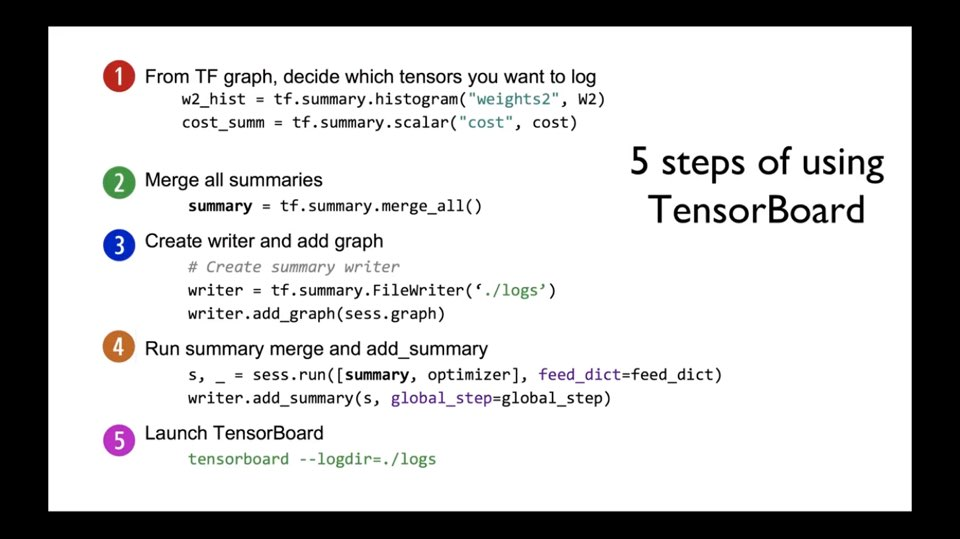

In [22]:
from IPython.display import Image
Image(filename='C:\\Users\\snuist\\Desktop\\image.jpg', width=600)b

In [29]:
tf.set_random_seed(777)
learning_rate = 0.01

In [3]:
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]

In [4]:
x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

In [5]:
X = tf.placeholder(tf.float32, [None, 2], name='x-input')
Y = tf.placeholder(tf.float32, [None, 1], name='y-input')

In [8]:
with tf.name_scope("layer1") as scope:
    W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
    b1 = tf.Variable(tf.random_normal([2]), name='bias1')
    L1 = tf.sigmoid(tf.matmul(X, W1) + b1)
    
    w1_hist = tf.summary.histogram("weights1", W1) #묶어줘야함
    b1_hist = tf.summary.histogram("biases1", b1)
    L1_hist = tf.summary.histogram("layer1", L1)

In [15]:
with tf.name_scope("layer2") as scope:
    W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
    b2 = tf.Variable(tf.random_normal([1]), name='bias2')
    hypothesis = tf.sigmoid(tf.matmul(L1, W2) + b2)
    
    w2_hist = tf.summary.histogram("weights2", W2)
    b2_hist = tf.summary.histogram("biases2", b2)
    hypothesis_hist = tf.summary.histogram("hypothesis", hypothesis)

# loss function & train

In [17]:
with tf.name_scope("cost") as scope:
    cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
    cost_summ = tf.summary.scalar("cost", cost)

In [18]:
with tf.name_scope("train") as scope:
    train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Accuracy computation

In [19]:
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))
accuracy_sum = tf.summary.scalar("accuracy", accuracy)

# Lauch graph

In [20]:
with tf.Session() as sess:
    # tensorboard --logdir=./logs/xor_logs
    merged_summary = tf.summary.merge_all()
    writer = tf.summary.FileWriter("./logs/xor_logs_r0_01")
    writer.add_graph(sess.graph)  # Show the graph

    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        summary, _ = sess.run([merged_summary, train], feed_dict={X: x_data, Y: y_data})
        writer.add_summary(summary, global_step=step)

        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict={
                  X: x_data, Y: y_data}), sess.run([W1, W2]))

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)

0 0.7156377 [array([[ 0.7926959 ,  0.6886104 ],
       [-1.2072834 , -0.29517072]], dtype=float32), array([[1.7177    ],
       [0.35572484]], dtype=float32)]
100 0.6907327 [array([[ 0.32268244, -0.23303036],
       [-0.7743417 ,  0.8052943 ]], dtype=float32), array([[1.4608113 ],
       [0.78415203]], dtype=float32)]
200 0.49503163 [array([[ 1.6721692, -2.3216543],
       [-2.2168636,  2.6561468]], dtype=float32), array([[2.8243914],
       [2.6025808]], dtype=float32)]
300 0.22374642 [array([[ 3.1877632, -3.7442877],
       [-3.6972432,  4.1295667]], dtype=float32), array([[4.7004085],
       [4.3188057]], dtype=float32)]
400 0.12229483 [array([[ 3.9886725, -4.520833 ],
       [-4.4841404,  4.903435 ]], dtype=float32), array([[5.8487263],
       [5.4189944]], dtype=float32)]
500 0.078843184 [array([[ 4.4861465, -5.0151863],
       [-4.973251 ,  5.39077  ]], dtype=float32), array([[6.6447487],
       [6.2020254]], dtype=float32)]
600 0.055981167 [array([[ 4.839386 , -5.370661 ],
     

5200 0.000705329 [array([[ 7.907476, -8.510482],
       [-8.365889,  8.825144]], dtype=float32), array([[15.356389],
       [14.979918]], dtype=float32)]
5300 0.00066705124 [array([[ 7.935819, -8.539501],
       [-8.39419 ,  8.853798]], dtype=float32), array([[15.463109],
       [15.087366]], dtype=float32)]
5400 0.00063107116 [array([[ 7.9638205, -8.568164 ],
       [-8.422157 ,  8.882103 ]], dtype=float32), array([[15.569275],
       [15.194242]], dtype=float32)]
5500 0.00059719477 [array([[ 7.991493, -8.596491],
       [-8.449792,  8.910081]], dtype=float32), array([[15.674908],
       [15.300581]], dtype=float32)]
5600 0.00056534726 [array([[ 8.018848, -8.62449 ],
       [-8.477118,  8.937737]], dtype=float32), array([[15.780047],
       [15.406411]], dtype=float32)]
5700 0.0005352899 [array([[ 8.045903, -8.65218 ],
       [-8.504144,  8.965088]], dtype=float32), array([[15.884717],
       [15.511765]], dtype=float32)]
5800 0.00050699257 [array([[ 8.07267  , -8.67957  ],
       [-8

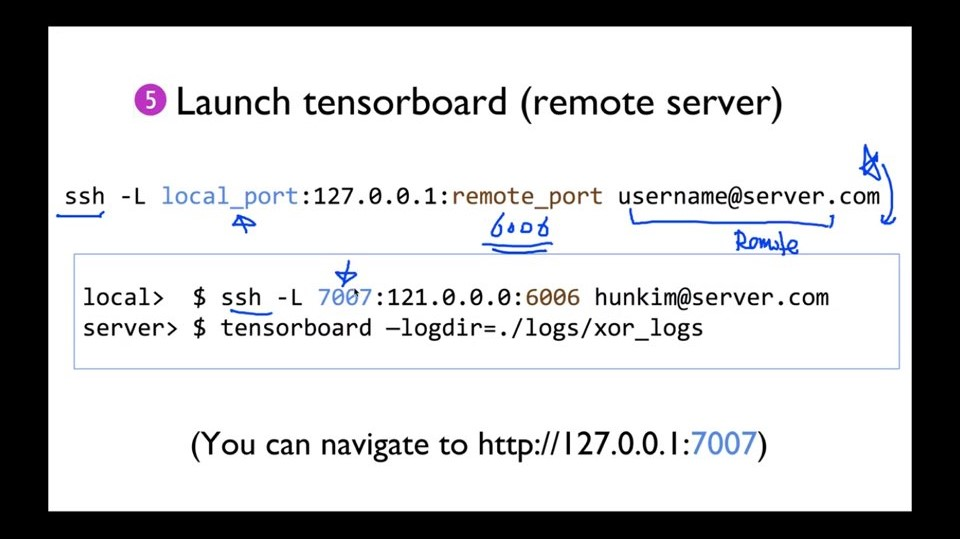

In [32]:
Image(filename='C:\\Users\\snuist\\Desktop\\image3.jpg', width=600)